In [1]:
#load dataframe from csv file (tidyied data)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None


In [2]:
url = 'https://drive.google.com/file/d/13EYjKfR3nLPlO1Fp6JrMV5zqVDh97Hct/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [3]:
# Q1

# Select a season to work on
new_df = df.loc[df['season'] == 20202021]

# Obtain the count for all shots
shots_count = new_df['shot_type'].count()

# Obtain the count for each shot type
shots_per_type = new_df.groupby('shot_type')['shot_type'].count()

# Obtain the goals count per shot type
goal_per_shot_type = (new_df.loc[new_df['result_event'] == 'Goal']).groupby('shot_type')['shot_type'].count()

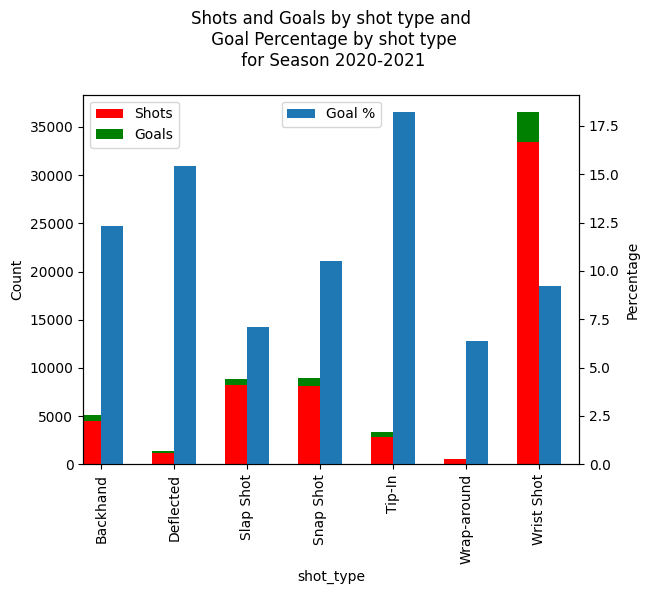

In [4]:
# Representation of Shots accross all teams vs Goals by shot type for the selected season year
# Data for the x and y axis

df2 = pd.concat([shots_per_type, goal_per_shot_type], axis =1, keys=['Shots', 'Goals'])

fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twinx()
width= 0.3

df2.plot(kind='bar', color=['red', 'green'], stacked=True, ax=ax, width=width, position=1)
ax.set_ylabel('Count')

df2['percentage'] = ((df2['Goals'] / df2['Shots'])*100).round(2)
line2 = df2.percentage.plot(kind='bar', ax=ax2, width=width, position=0)
line2.set_ylabel('Percentage')
line2.legend(['Goal %'], loc='upper center')

plt.title("Shots and Goals by shot type and\n Goal Percentage by shot type\n for Season 2020-2021\n")
plt.show()

In [5]:
# Q2
# Select multiple seasons starting 2018-2019 up to 2020-2021
# Explore the relationship between the distance a shot was taken and the chance it was a goal
# Describe briefly each figure and notice any change over the seasons. Why use this particular figure? 

# Get the different dataframes for each season between 2018 and 2020
df_2018 = df.loc[df['season'] == 20182019].filter(['result_event', 'x_coord', 'y_coord', 'shot_type'])
df_2019 = df.loc[df['season'] == 20192020].filter(['result_event', 'x_coord', 'y_coord'])
df_2020 = df.loc[df['season'] == 20202021].filter(['result_event', 'x_coord', 'y_coord'])
df_2018

,result_event,x_coord,y_coord,shot_type
222710,Shot,-39.0,-33.0,Snap Shot
222711,Shot,-47.0,23.0,Snap Shot
222712,Shot,-78.0,5.0,Snap Shot
222713,Shot,-39.0,-13.0,Snap Shot
222714,Shot,-76.0,-32.0,Backhand
...,...,...,...,...
309818,Shot,89.0,4.0,Wrist Shot
309819,Shot,-50.0,-37.0,Wrist Shot
309820,Shot,-58.0,-20.0,Wrist Shot
309821,Shot,-21.0,15.0,Wrist Shot


In [6]:
df_2018['dist'] = np.sqrt(np.square(90 - abs(df_2018['x_coord'])) + np.square(df_2018['y_coord']))
df_2019['dist'] = np.sqrt(np.square(90 - abs(df_2019['x_coord'])) + np.square(df_2019['y_coord']))
df_2020['dist'] = np.sqrt(np.square(90 - abs(df_2020['x_coord'])) + np.square(df_2020['y_coord']))

In [7]:
df_2018_with_type = df_2018.drop(['x_coord', 'y_coord'], axis=1)
df_2018 = df_2018.drop(['x_coord', 'y_coord', 'shot_type'], axis =1)
df_2019 = df_2019.drop(['x_coord', 'y_coord'], axis =1)
df_2020 = df_2020.drop(['x_coord', 'y_coord'], axis =1)
df_2018_with_type

,result_event,shot_type,dist
222710,Shot,Snap Shot,60.745370
222711,Shot,Snap Shot,48.764741
222712,Shot,Snap Shot,13.000000
222713,Shot,Snap Shot,52.630789
222714,Shot,Backhand,34.928498
...,...,...,...
309818,Shot,Wrist Shot,4.123106
309819,Shot,Wrist Shot,54.488531
309820,Shot,Wrist Shot,37.735925
309821,Shot,Wrist Shot,70.611614


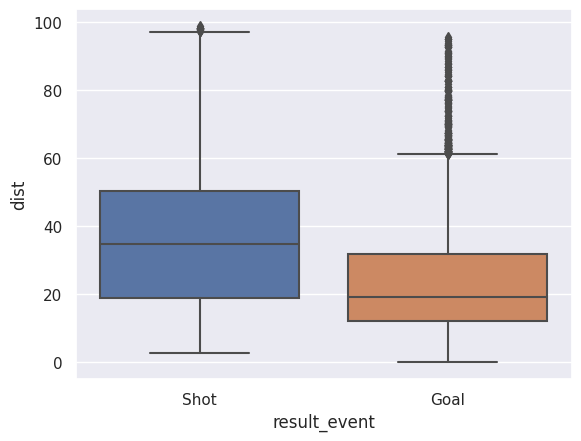

In [8]:
# Plot for season 2018-2019
sns.set(style="darkgrid")
sns.boxplot(x=df_2018['result_event'], y=df_2018['dist'])
plt.show()


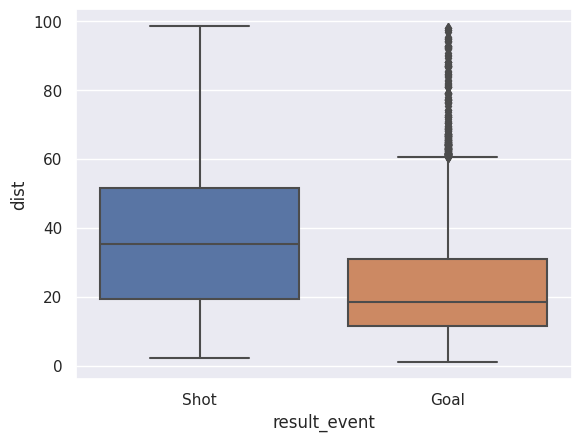

In [9]:
# Plot for season 2019-2020
sns.set(style="darkgrid")
sns.boxplot(x=df_2019['result_event'], y=df_2019['dist'])
plt.show()

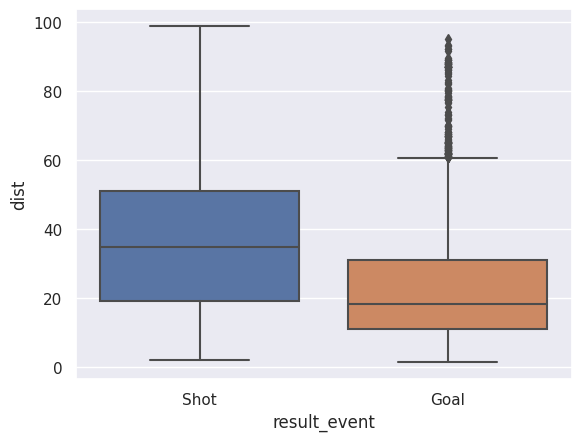

In [10]:
# Plot for season 2020-2021
sns.set(style="darkgrid")
sns.boxplot(x=df_2020['result_event'], y=df_2020['dist'])
plt.show()

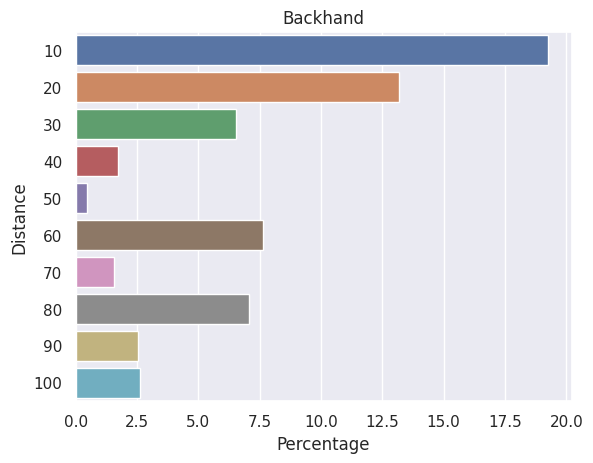

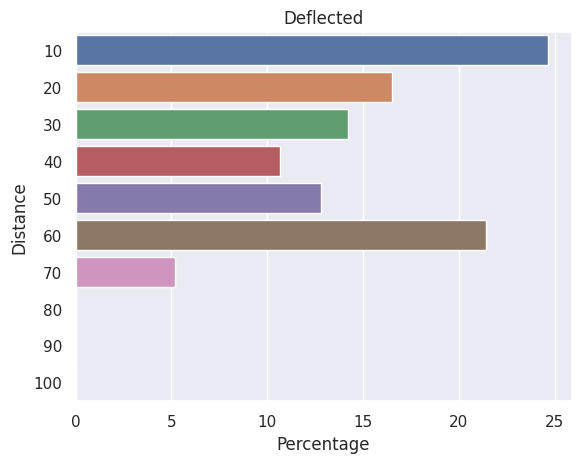

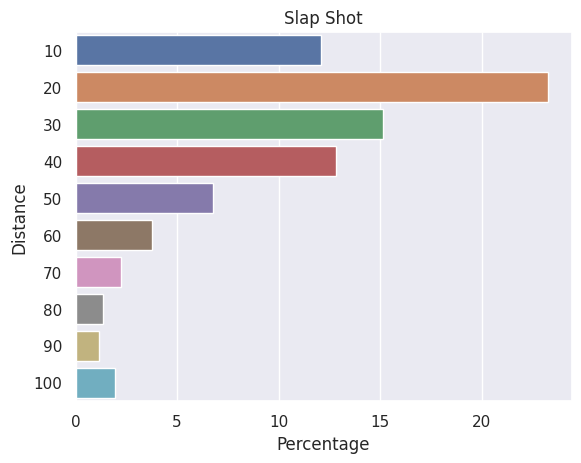

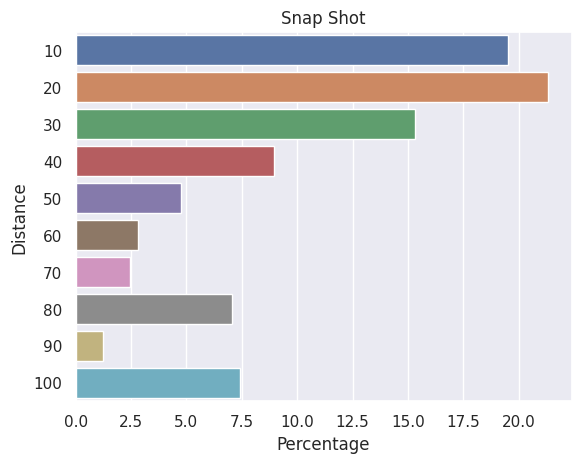

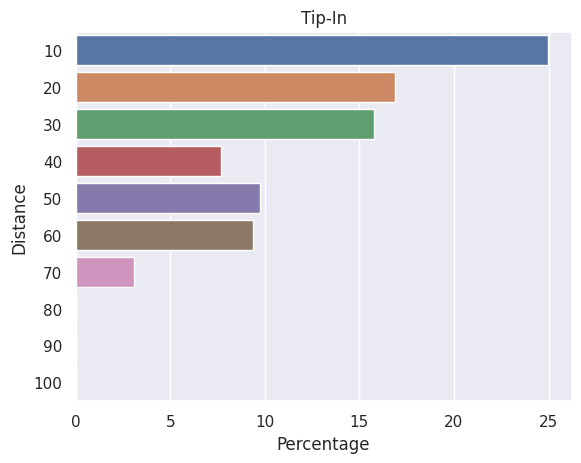

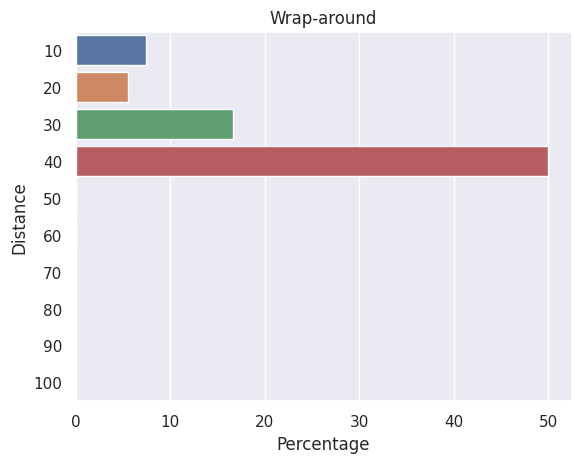

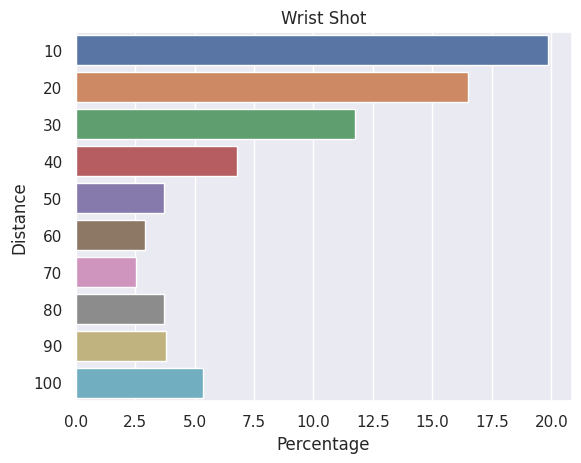

In [11]:
#@title Version A for q3
# Question 3 -- season 2018-2019 

 # a. Get shots, goals, coords per shot type
 # b. Compute the distance, and goal/shot ratio
 # c. Plot the different graphs (ratio in function of the distance) depending on the shot type

def plotGraph(pframe, currentType):
  pframe['Distance'] = bins[1:]
  pframe.drop('binned', axis=1)
  sns.barplot( x ='Percentage', y ='Distance', data = pframe, orient='h').set_title(currentType)
  plt.show()
  print()

def q3(shot, currentType):  
  shotGroup= shot.get_group(currentType)
  goalGroup = shotGroup.loc[shotGroup['result_event'] == 'Goal']
  
  goalGroup['binned'] = pd.cut(goalGroup['dist'], bins)
  visualGoal = goalGroup.groupby('binned').size().reset_index(name= "goal_count")

  # Compute the percentage of goal
  shotGroup['binned'] = pd.cut(shotGroup['dist'], bins)
  visualAll = shotGroup.groupby(by='binned').size().reset_index(name="shot_count")
  visualGoal['shot_count'] = visualAll['shot_count']
  visualGoal['Percentage'] = visualGoal['goal_count']/visualAll['shot_count'] *100
  plotGraph(visualGoal, currentType)
  
    
shotN = df_2018_with_type.groupby('shot_type')
alltypes = shotN.groups.keys()
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # bins for distance
for atype in alltypes:
  q3(shotN, atype)

/home/hanifa/ift6758-venv/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hanifa/ift6758-venv/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/hanifa/ift6758-venv/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/hanifa/ift6758-venv/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/hanifa/ift6758-venv/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: it

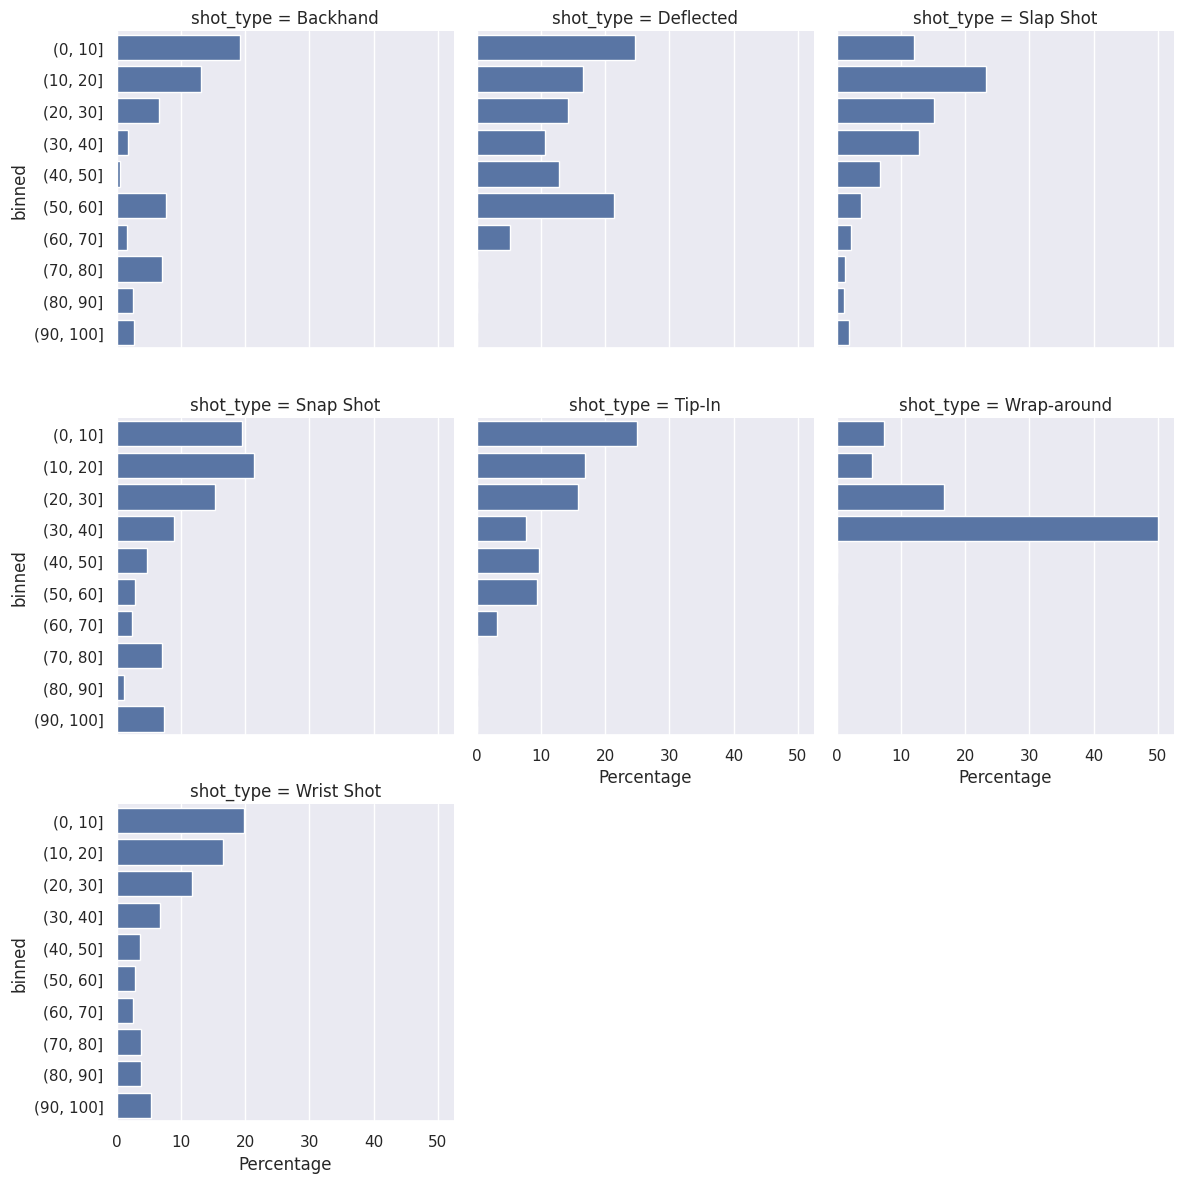

In [12]:
#@title Version B for q3
def plotGraph(pframe):
  g = sns.FacetGrid(pframe, col='shot_type', height=4, col_wrap=3)
  g.map(sns.barplot, 'Percentage', 'binned', orient='h')
  plt.show()
  print()

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # bins for distance

shotGroup= df_2018_with_type
goalGroup = shotGroup.loc[shotGroup['result_event'] == 'Goal']
goalGroup['binned'] = pd.cut(goalGroup['dist'], bins)
  
visualGoal = goalGroup.groupby(['shot_type','binned']).size().reset_index(name="goal_count")
  
# Compute the percentage of goal
shotGroup['binned'] = pd.cut(shotGroup['dist'], bins)
visualAll = shotGroup.groupby(['shot_type','binned']).size().reset_index(name="shot_count")

visualGoal['shot_count'] = visualAll['shot_count'] # combine the prev line with this one
visualGoal['Percentage'] = visualGoal['goal_count']/visualGoal['shot_count'] * 100
  
plotGraph(visualGoal)